In [1]:
%load_ext autoreload
%autoreload 2


%matplotlib inline

In [2]:
%cd C:\MAD4AG

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

C:\MAD4AG


In [3]:
# filename = r'.\dbs\twins\run-evaluate.pkl'
filename = r'.\dbs\twins\run-evaluate_work.pkl'


df_twins=  pd.read_pickle(filename)

df_survey_twins = pd.read_pickle(f'./dbs/intermediate/df_survey_twins.pkl')

In [4]:
print('The share of the matched survey ppl: ', np.round(len(df_twins.sub_id.unique())/len(df_survey_twins.sub_id.unique()),2))

The share of the matched survey ppl:  0.98


In [5]:
print('Repetition number of 10 most matched people \n', df_twins.sub_id.value_counts().head(10))

Repetition number of 10 most matched people 
 20110251091    242
20111951088    241
20134751003    234
20111541082    233
20111021098    232
20140241071    232
20124731031    232
20135211019    231
20114731096    231
20114151080    231
Name: sub_id, dtype: int64


In [6]:
print('The share of employees in the survey: ',np.round(
      len(df_survey_twins['sub_id'][df_survey_twins.employee == 1].unique()) / len(
          df_survey_twins['sub_id'].unique()),2))
print('The share of employees in MAD: ',
      np.round(df_twins['wt'][df_twins.employee == 1].sum() / df_twins['wt'].sum(),2))

The share of employees in the survey:  0.75
The share of employees in MAD:  0.54


In [7]:
print('The work activity participation in the survey: ',np.round(
      len(df_survey_twins['sub_id'][df_survey_twins.commute == 1].unique()) / len(
          df_survey_twins['sub_id'].unique()),2))
print('The work activity participation in MAD: ',
      np.round(df_twins['wt'][df_twins.commute == 1].sum() / df_twins['wt'].sum(),2))

The work activity participation in the survey:  0.55
The work activity participation in MAD:  0.46


In [8]:
print('The work activity participation of employees in the survey: ',np.round(
      len(df_survey_twins['sub_id'][df_survey_twins.commute == 1].unique()) / len(
          df_survey_twins['sub_id'][df_survey_twins.employee == 1].unique()),2))
print('The work activity participation of employees in MAD: ',
      np.round(df_twins['wt'][df_twins.commute == 1].sum() / df_twins['wt'][df_twins.employee == 1].sum(),2))

The work activity participation of employees in the survey:  0.74
The work activity participation of employees in MAD:  0.84


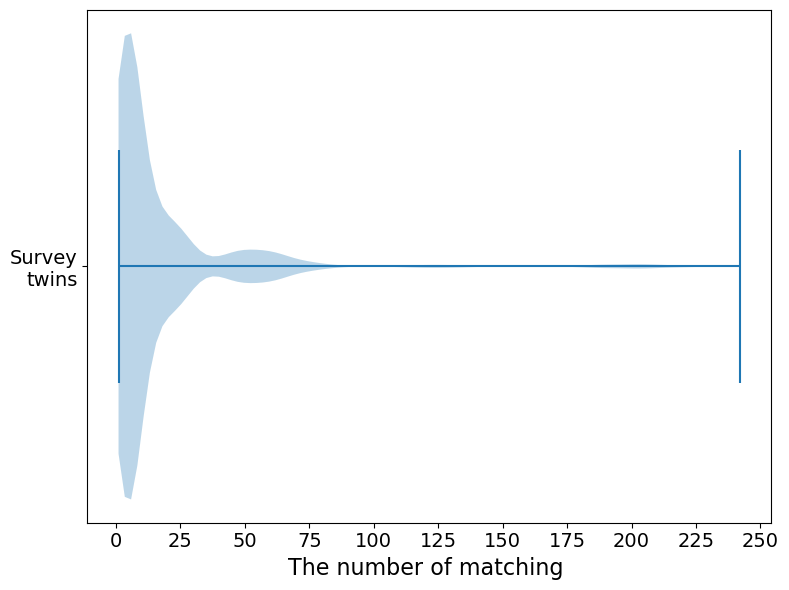

In [9]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))


ax1.violinplot(df_twins.sub_id.value_counts(), vert=False)
#ax1.set_title('The number of matching ', fontsize=14)
ax1.set_yticks([1], labels=['Survey\ntwins'], fontsize=14)
ax1.set_xticks(range(0,275,25),range(0,275,25), fontsize=14)
# # #
# # ax1.set_xticklabels(range(-500, 2501, 500), fontsize=12)
# # ax1.set_ylabel('Urban density levels', fontsize=14)
ax1.set_xlabel('The number of matching ', fontsize=16)
# #
# fig.suptitle('The distance distribution between Home and Work/School' , fontsize=14)
fig.tight_layout()
plt.savefig("./figures/survey_ppl_repetition_number.png")
plt.show()

## Evaluation of act seq

In [10]:
seq_hist = df_survey_twins.act_seq_simp.value_counts(normalize=True).reset_index(name='share_survey').sort_values(by='share_survey', ascending=False)

mad_seq_hist= df_twins.groupby('act_seq_simp')['wt'].sum()/df_twins['wt'].sum()
mad_seq_hist= mad_seq_hist.reset_index(name='share_mad')
#aac['act_uniq']= aac['act_uniq'].astype(str)

seq_hist = pd.merge(seq_hist,mad_seq_hist, left_on='index', right_on='act_seq_simp')

seq_hist.drop(columns=['act_seq_simp'], inplace=True)

In [11]:
seq_hist['index']= seq_hist['index'].astype(str)

seq_hist['index']= seq_hist['index'].str.replace('Home','H')
seq_hist['index']= seq_hist['index'].str.replace('Work','W')
seq_hist['index']= seq_hist['index'].str.replace('Other','O')
# seq_hist['index']= seq_hist['index'].str.replace('School','W')
# seq_hist = seq_hist.groupby('index').sum().reset_index()
# seq_hist.sort_values(by='share_survey',inplace=True,ascending=False)

In [12]:

seq_hist['index']= seq_hist['index'].str.replace(',','-')
seq_hist['index']= seq_hist['index'].str.replace('["\']','')
seq_hist['index']= seq_hist['index'].str.replace('(','')
seq_hist['index']= seq_hist['index'].str.replace(')','')
seq_hist['index']= seq_hist['index'].str.replace(' ','')

In [13]:
seq_hist

,index,share_survey,share_mad
0,H-W-H,0.237615,0.204989
1,H-O-H,0.220206,0.264299
2,H-O-H-O-H,0.059219,0.073688
3,H-O-O-H,0.057740,0.069806
4,H-W-O-H,0.055051,0.045135
...,...,...,...
429,H-O-H-W-H-O-H-O-H-O-H,0.000067,0.000075
430,H-O-O-W-O-H-O-O-O-H,0.000067,0.000058
431,H-O-W-O-H-W-O-H,0.000067,0.000069
432,H-O-W-O-W-O-W-O-O-H,0.000067,0.000045


In [14]:
from scipy.spatial import distance

print("Jensen-Shannon distance is a value between 0 and 1. A value of 0 indicates that the two distributions are identical, while a value closer to 1 indicates greater dissimilarity between the distributions.")
distance = np.round(distance.jensenshannon(seq_hist.iloc[:, 1], seq_hist.iloc[:, 2]),4)

print("Jensen-Shannon distance:", distance)


Jensen-Shannon distance is a value between 0 and 1. A value of 0 indicates that the two distributions are identical, while a value closer to 1 indicates greater dissimilarity between the distributions.
Jensen-Shannon distance: 0.0728


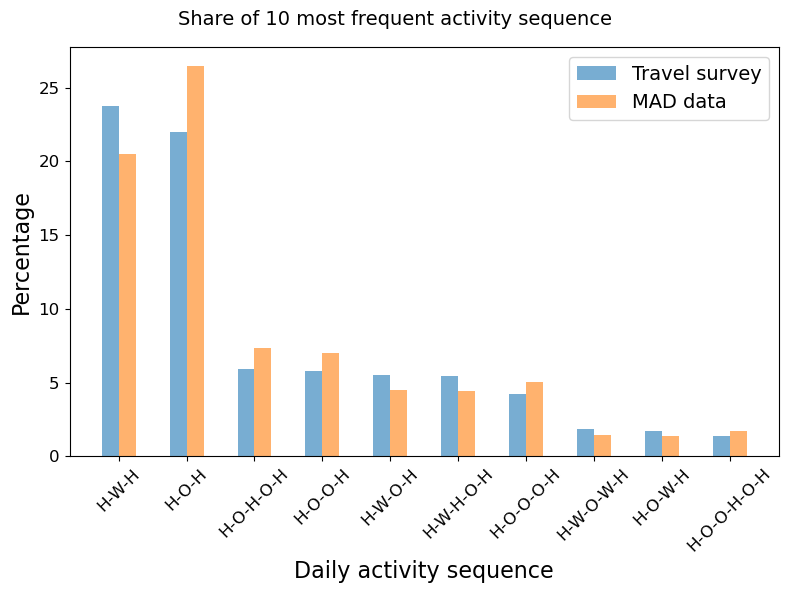

In [15]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))

X = np.arange(10)

ax0.bar(X- 0.125, seq_hist.iloc[:10, 1], width = 0.25, alpha=0.6, label='Travel survey')
ax0.bar(X+ 0.125, seq_hist.iloc[:10, 2], width = 0.25, alpha=0.6, label='MAD data')
# ax0.grid(visible=False)
#
ax0.legend( prop={'size': 14}, fontsize=14)
ax0.set_xlabel('Daily activity sequence', fontsize=16)
ax0.set_xticks(range(0,10),seq_hist.iloc[:10, 0], fontsize=12, rotation=45)
ax0.set_yticklabels(range(0, 30, 5), fontsize=12)
ax0.set_ylabel('Percentage', fontsize=16)


fig.suptitle('Share of 10 most frequent activity sequence' , fontsize=14)
fig.tight_layout()
plt.savefig("./figures/most_frequent_activity_sequence.jpg")
plt.show()


In [16]:
print('10 most frequent activity sequence contains %s percent of the data'%np.round(seq_hist.iloc[:10, 2].sum()*100,2))


10 most frequent activity sequence contains 79.79 percent of the data
